In [1]:
#Importing the required python libraries for EDA & Hypothesis testing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from scipy.stats import binom,geom,norm  #Libraries for normal, binomial & geometric distribution respectively
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel #Libraries for Ttest 1 sample, Ttest Index (for 2 groups) and relative T-test

from scipy.stats import chisquare, chi2 #calculate chisquare value internally, check the p-value for known chi-square val
from scipy.stats import chi2_contingency #calculate chi-square val for 2D Matrix

from scipy.stats import f_oneway, kruskal #Check statistical difference between Numerical vs Categorical values
from scipy.stats import shapiro #Test if  data is Gaussian (50 to 200 samples)
from scipy.stats import levene #Test Variance between two groups 

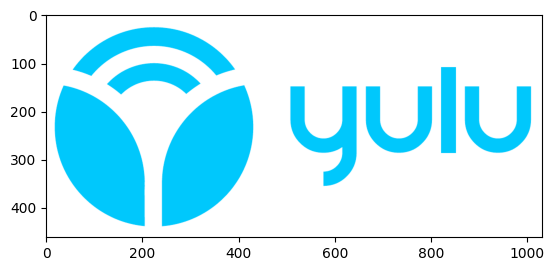

In [2]:
#Importing the dataset to Pandas dataframe

data=pd.read_csv('yulu.csv')

In [3]:
#Checking first few entries of dataset to understand the available data
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
#Checking the datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# Column Description:

datetime: datetime

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

weather:

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered

In [5]:
#Checking the dataset size
data.shape

(10886, 12)

The available dataset has 10886 rows and 12 columns

In [7]:
#Checking the null entries across the columns
data.isna().sum(axis=0)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [11]:
#Checking the unique values in each columns to check for any incorrect data across any columns
for col in data.columns:
    print("Column Name: ",col)
    print(data[col].unique())
    print()

Column Name:  datetime
['2011-01-01 00:00:00' '2011-01-01 01:00:00' '2011-01-01 02:00:00' ...
 '2012-12-19 21:00:00' '2012-12-19 22:00:00' '2012-12-19 23:00:00']

Column Name:  season
[1 2 3 4]

Column Name:  holiday
[0 1]

Column Name:  workingday
[0 1]

Column Name:  weather
[1 2 3 4]

Column Name:  temp
[ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 38.54  1.64  0.82 39.36
 41.  ]

Column Name:  atemp
[14.395 13.635 12.88  17.425 19.695 16.665 21.21  22.725 21.97  20.455
 11.365 10.605  9.85   8.335  6.82   5.305  6.06   9.09  12.12   7.575
 15.91   3.03   3.79   4.545 15.15  18.18  25.    26.515 27.275 29.545
 23.485 25.76  31.06  30.305 24.24  18.94  31.82  32.575 33.335 28.79
 34.85  35.605 37.12  40.15  41.665 40.91  39.395 34.09  28.03  36.365
 37.88  42.425 43.

The dataset does not contain any null values in any column, nor does it have any incorrect/garbage data in any column, hence no data cleansing is required